In [658]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import linkage

sns.color_palette("YlGnBu", 10)
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', 500)

## 1. Reading and understanding the dataset

Let us import the dataset and run few analysis to understand what all we have

In [659]:
data = pd.read_csv('./Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [660]:
data.shape

(167, 10)

**Info**

- The info the dataframe tells us there no null values in the dataset (We will verify this below)
- All columns are of type number (float and int) except first column
- Columns `country` is of type object

In [661]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


**Columns**

In [662]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

## 2. Exploratory Data Analysis

### Data missing value check

- No columns have null values

This eliminates the step of dropping and removing the columns with higher percentage of missing rows.

In [663]:
round(data.isnull().sum()/len(data) * 100, 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

### 2.1 BiVariate Analysis

#### Column `child_mort`

Looking at the top 10 countries, `Haiti` has the highest child death rate i.e around 210.

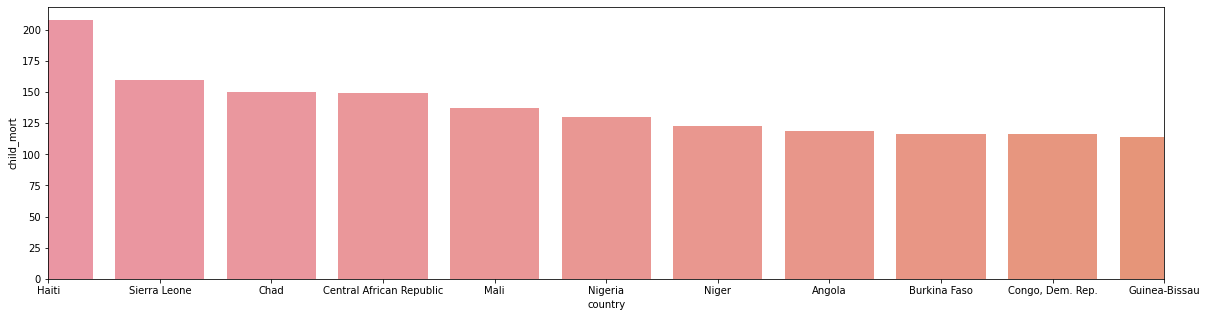

In [664]:
plt.figure(figsize=(20, 5))
max_mort = data.groupby('country', as_index=False).child_mort.max().sort_values(by='child_mort', ascending=False)
sns.barplot(x='country', data=max_mort, y='child_mort')
plt.xlim(0, 10)
plt.show()

#### Column `income`

**Qatar** has the highest income bar amongst all countries where as **Democratic Republic of Congo** has the lowest income bar.

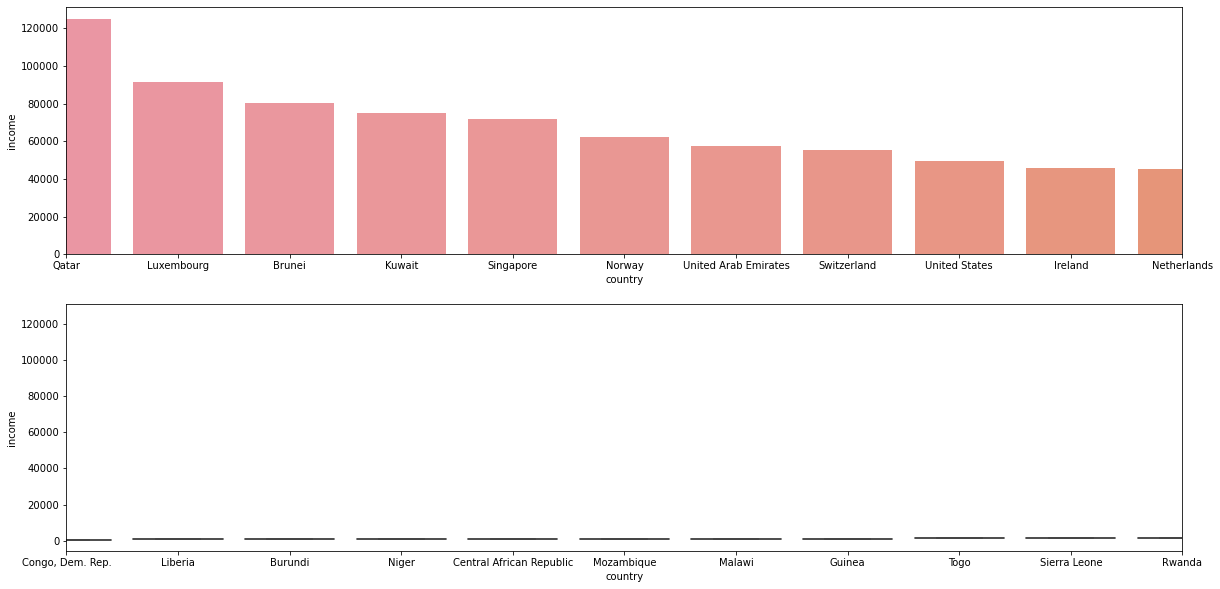

In [665]:
plt.figure(figsize=(20, 10))
high_income = data.groupby('country', as_index=False).income.max().sort_values(by='income', ascending=False)
lowest_income = data.groupby('country', as_index=False).income.min().sort_values(by='income')

plt.subplot(211)
sns.barplot(x='country', y='income', data=high_income)
plt.xlim(0, 10)

plt.subplot(212)
sns.boxplot(x='country', y='income', data=lowest_income)
plt.xlim(0, 10)

plt.show()

#### Column `gdpp`.

GDP Per capita is highest in **Lunxembourg** and lowest in **Burundi**

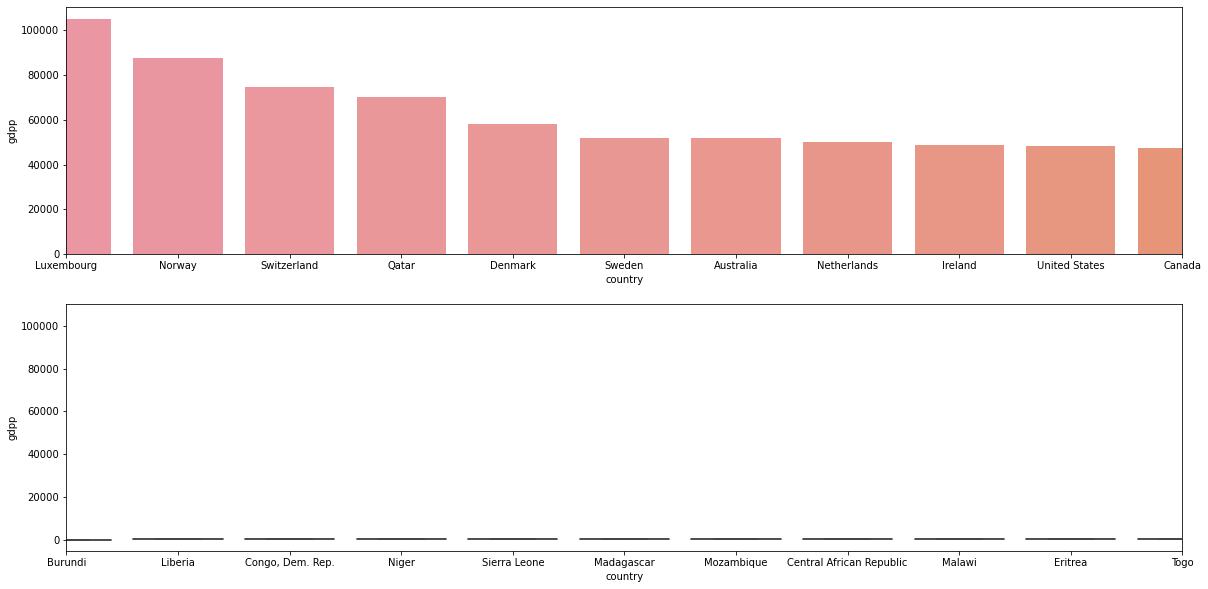

In [666]:
plt.figure(figsize=(20, 10))
high_gdpp = data.groupby('country', as_index=False).gdpp.max().sort_values(by='gdpp', ascending=False)
lowest_gdpp = data.groupby('country', as_index=False).min().sort_values(by='gdpp', ascending=True)

plt.subplot(211)
sns.barplot(x='country', y='gdpp', data=high_gdpp)
plt.xlim(0, 10)

plt.subplot(212)
sns.boxplot(x='country', y='gdpp', data=lowest_gdpp)
plt.xlim(0, 10)

plt.show()

### 2.1 Outlier detection

In [667]:
def plot_box(df, cols):
    figure = 1
    row = 1
    plt.figure(figsize=(15, 15))
    for i in range(len(cols)):
        fig = str(9) + "3" + str(figure)
        plt.subplot(int(fig))
        sns.boxplot(df[cols[i]])
        if figure == 3:
            plt.figure(figsize=(15, 15))
            figure = 1
            row += 1
        else:
            figure += 1

    plt.show()

def plot_dist(df, cols):
    figure = 1
    row = 1
    plt.figure(figsize=(15, 15))
    for i in range(len(cols)):
        try:
            fig = str(9) + "3" + str(figure)
            plt.subplot(int(fig))
            sns.distplot(df[cols[i]])
            if figure == 3:
                plt.figure(figsize=(15, 15))
                figure = 1
                row += 1
            else:
                figure += 1
        except:
            print("Error plotting column ", cols[i])

    plt.show()

In [668]:
number_columns = data.select_dtypes(np.number).columns
number_columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')


#### 2.1.1 Visualizing outliers

Box plt and distribution chart help us visualize the outliers for each column.

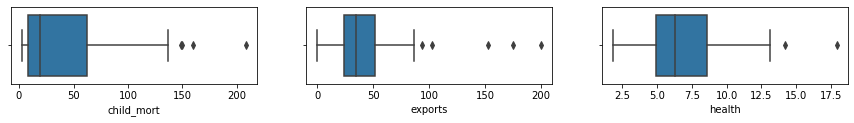

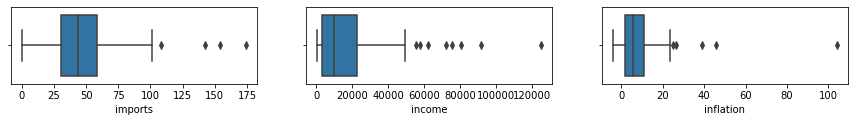

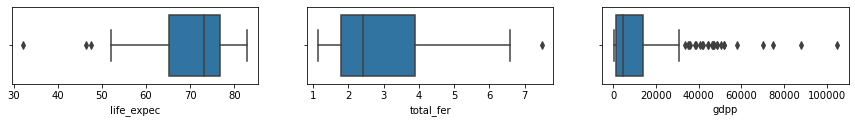

<Figure size 1080x1080 with 0 Axes>

In [669]:
plot_box(data, number_columns)

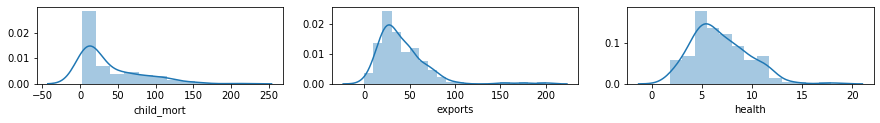

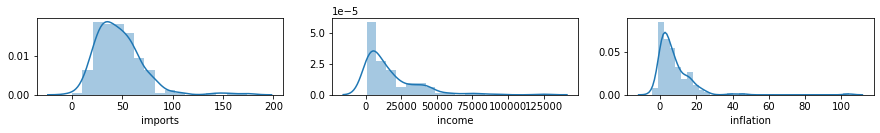

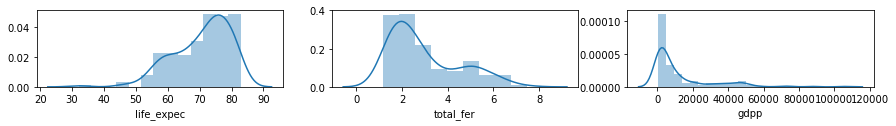

<Figure size 1080x1080 with 0 Axes>

In [670]:
plot_dist(data, number_columns)

Let us plot distribution chart to see the distribution of all above columns

#### 2.2.2 Detecting outliers statistically

There are multiple techniques that we could use here like 

1. Z-Score.
2. Selecting values within a range of percentile.
3. Capping the outliers and replacing them with highest and the lowest values within the range.


Approach 1, and 2 will end up eliminating the outliers and bringing down the number of rows in the dataset. In this case study we will be using approach 3 to treat outliers. 

All of the columns except `child_mort` and `inflation` will be capped at higher range.

##### Capping outliers from column `exports`.

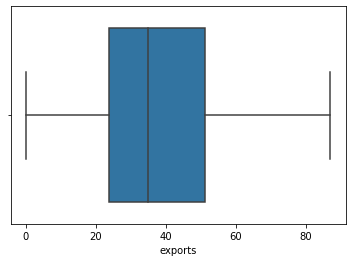

In [671]:

exports_quantile = data.exports.quantile([0.01, 0.97]).values
data['exports'][data['exports'] >= exports_quantile[1]] = round(exports_quantile[1], 2)
sns.boxplot(data.exports)

##### Capping outliers from column `health`.

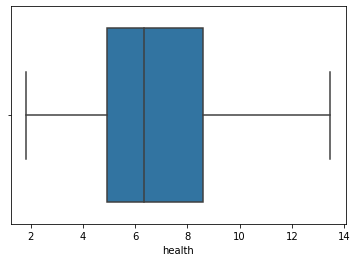

In [672]:
health_quantile = data.health.quantile([0.01, 0.99]).values
data['health'][data['health'] >= health_quantile[1]] = health_quantile[1]
sns.boxplot(data.health)

##### Capping outliers from column `imports`.

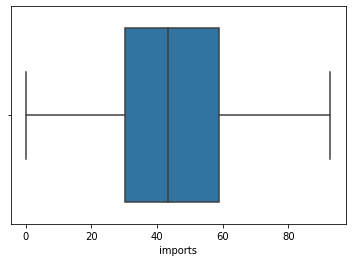

In [673]:
imports_upper_cap = data.imports.quantile(0.97)
data['imports'][data['imports'] >= imports_upper_cap] = imports_upper_cap

sns.boxplot(data.imports)

##### Capping outliers from column `income`.

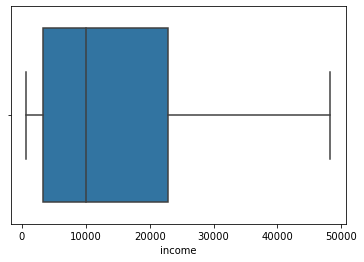

In [674]:
income_upper_cap = data.income.quantile(0.95)
data['income'][data.income >= income_upper_cap] = income_upper_cap
sns.boxplot(data.income)

##### Capping outliers from column `total_fer`.

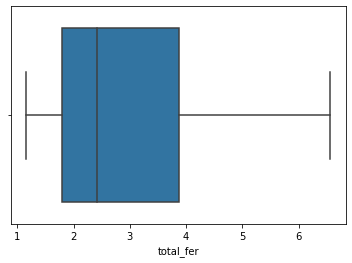

In [675]:
total_fer_upper_cap = data.total_fer.quantile(0.99)
data['total_fer'][data['total_fer'] >= total_fer_upper_cap] = total_fer_upper_cap
sns.boxplot(data.total_fer)

##### Capping outliers from column `gdpp`.

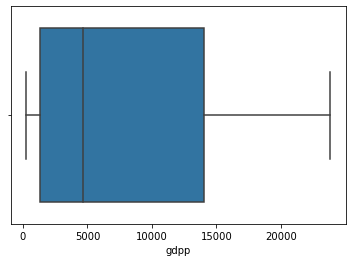

In [676]:
gdpp_upper_cap = data.gdpp.quantile(0.82)
data['gdpp'][data['gdpp'] >= gdpp_upper_cap] = gdpp_upper_cap

sns.boxplot(data.gdpp)

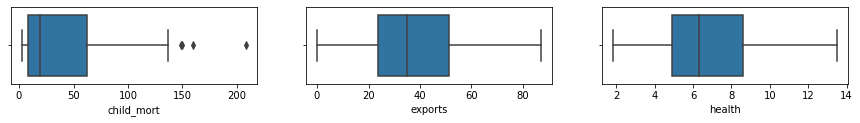

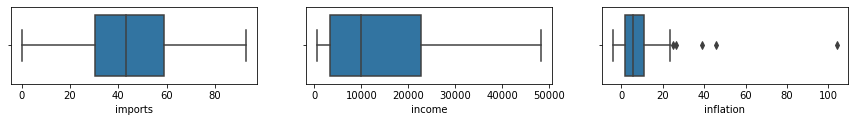

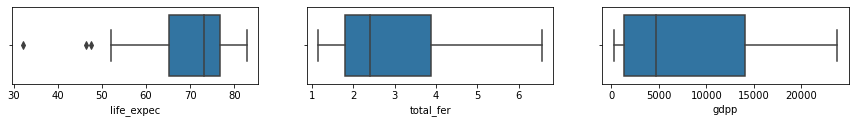

<Figure size 1080x1080 with 0 Axes>

In [677]:
plot_box(data, list(number_columns))

## 3. Modeling

### 3.1 Hopkins check

Hopkins check is done to check the cluster tendency. Hopkins will return a score between 0 - 100. Score returned is treated like below 

1. Below 50: Data has no cluster tendency
2. 50 - 70: Data has good clustering tendncy
3. 80 - 100: A score between 80 - 100 means the dataset has really good cluster tendency

On current dataset, the hopkin score is around 91% that means the dataset has really good cluster tendency.

In [678]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [679]:
hop_score = 0
for i in range(0, 10):
    hop_score += hopkins(data[number_columns])

round(hop_score/10, 2)

0.92

In [680]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0


### 3.2 Scaling

Using Standard Scaling to transform the numeric columns

In [681]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[number_columns])
scaled_data

array([[ 1.29153238, -1.40999952,  0.30123858, ..., -1.61909203,
         1.92639646, -0.94761961],
       [-0.5389489 , -0.54599523, -0.08896601, ...,  0.64786643,
        -0.86505432, -0.54073289],
       [-0.27283273, -0.04679276, -0.99060381, ...,  0.67042323,
        -0.03498262, -0.49816911],
       ...,
       [-0.37231541,  1.56601524,  0.02089742, ...,  0.28695762,
        -0.66423052, -0.86053642],
       [ 0.44841668, -0.44999476, -0.60797601, ..., -0.34463279,
         1.15657191, -0.86053642],
       [ 1.11495062, -0.11399309, -0.33900002, ..., -2.09278484,
         1.64524315, -0.84328084]])

In [682]:
scaled_data = pd.DataFrame(scaled_data, columns=number_columns)
scaled_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.410000,0.301239,-0.035794,-0.958349,0.157336,-1.619092,1.926396,-0.947620
1,-0.538949,-0.545995,-0.088966,0.152911,-0.394006,-0.312347,0.647866,-0.865054,-0.540733
2,-0.272833,-0.046793,-0.990604,-0.724314,-0.192552,0.789274,0.670423,-0.034983,-0.498169
3,2.007808,1.100413,-1.490672,-0.137797,-0.667360,1.387054,-1.179234,2.153997,-0.605154
4,-0.695634,0.294009,-0.285963,0.678226,0.227992,-0.601749,0.704258,-0.543736,0.392219


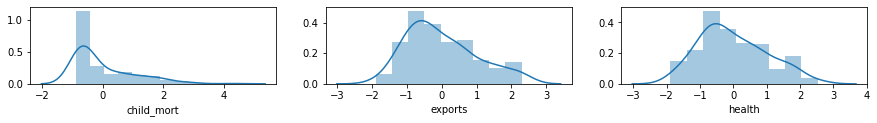

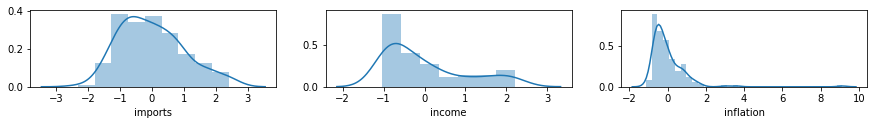

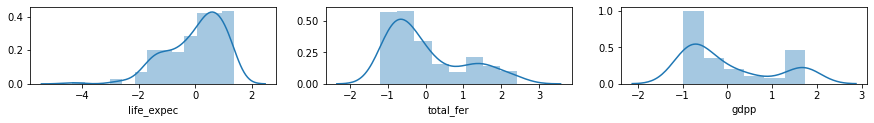

<Figure size 1080x1080 with 0 Axes>

In [683]:
plot_dist(scaled_data, number_columns)

### 3.3 Finding the optimal number of clusters

We will be performing below two techniques to figure the optimal number of clusters that must be there.

1. Elbow curve
2. Silhouette Analysis

We will run sample on min 2 cluster and max 10 cluster for both the analysis

#### Result

We see that cluster count 3 is an optimal number according to both above techniques.

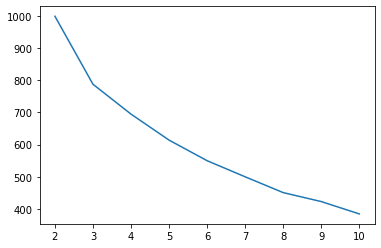

In [684]:
# Elbow curve
ssd = []

for cluster in range(2, 11):
    kmeans = KMeans(n_clusters=cluster, max_iter=50)
    kmeans.fit(scaled_data)
    
    ssd.append([cluster, kmeans.inertia_])
    
df_ssd = pd.DataFrame(ssd)
plt.plot(df_ssd[0], df_ssd[1])

For n_clusters=2, the silhouette score is 0.3
For n_clusters=3, the silhouette score is 0.28
For n_clusters=4, the silhouette score is 0.27
For n_clusters=5, the silhouette score is 0.24
For n_clusters=6, the silhouette score is 0.25
For n_clusters=7, the silhouette score is 0.27
For n_clusters=8, the silhouette score is 0.24
For n_clusters=9, the silhouette score is 0.28
For n_clusters=10, the silhouette score is 0.25


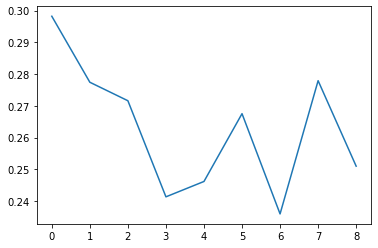

In [685]:
# Silhouette Score
ss = []
for cluster in range(2, 11):
    kmeans = KMeans(n_clusters=cluster, max_iter=50)
    kmeans.fit(scaled_data)
    
    silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
    print("For n_clusters={0}, the silhouette score is {1}".format(cluster, round(silhouette_avg, 2)))
    
    ss.append(silhouette_avg)
    
df_ss = pd.DataFrame(ss)
plt.plot(ss)

### 3.3 KMeans Clustering

Building the KMeans model with 3 clusters

In [686]:
kmeans = KMeans(n_clusters=3, random_state=50, max_iter=50)
kmeans.fit(scaled_data)

KMeans(max_iter=50, n_clusters=3, random_state=50)

In [687]:
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       2, 2, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 2, 1, 0, 0,
       1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [688]:
labels = pd.DataFrame(kmeans.labels_, columns=['cluster_label'])
labels.head()

,cluster_label
0,1
1,0
2,0
3,1
4,0


In [689]:
kmean_df = data.copy()
data_kmeans = pd.concat([kmean_df, labels], axis=1)
data_kmeans.head()

data_kmeans_scaled = scaled_data.copy()
data_kmeans_scaled = pd.concat([data_kmeans_scaled, labels], axis=1)
data_kmeans_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label
0,1.291532,-1.410000,0.301239,-0.035794,-0.958349,0.157336,-1.619092,1.926396,-0.947620,1
1,-0.538949,-0.545995,-0.088966,0.152911,-0.394006,-0.312347,0.647866,-0.865054,-0.540733,0
2,-0.272833,-0.046793,-0.990604,-0.724314,-0.192552,0.789274,0.670423,-0.034983,-0.498169,0
3,2.007808,1.100413,-1.490672,-0.137797,-0.667360,1.387054,-1.179234,2.153997,-0.605154,1
4,-0.695634,0.294009,-0.285963,0.678226,0.227992,-0.601749,0.704258,-0.543736,0.392219,0


In [807]:
# Country counts in each cluster
data_kmeans.cluster_label.value_counts()

0    80
1    46
2    41
Name: cluster_label, dtype: int64

### 3.3.1 KMeans Cluster Profiling

Visualizing the clusters on scatter plots for column pairs:

1. income and gdpp
2. income and child_mort
3. gdpp and child_mort

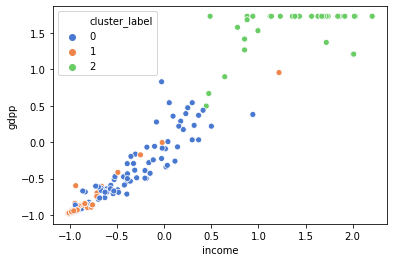

In [690]:
sns.scatterplot(x='income', y='gdpp', hue='cluster_label', data=data_kmeans_scaled, palette='muted')
plt.show()

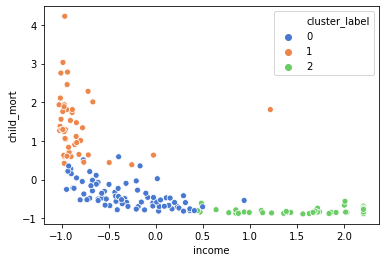

In [691]:
sns.scatterplot(x='income', y='child_mort', hue='cluster_label', data=data_kmeans_scaled, palette='muted')
plt.show()

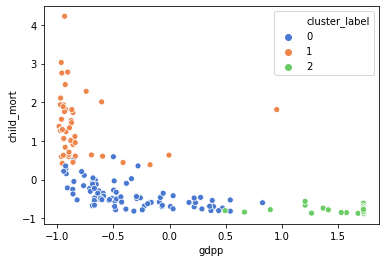

In [692]:
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_label', data=data_kmeans_scaled, palette='muted')
plt.show()

#### 3.3.2 Profiling the results

Profilling the result on the basis of the below analysis.

1. income and gdpp
2. income and child_mort
3. gdpp and child_mort

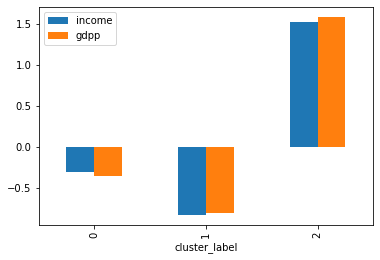

In [693]:
# income and gdpp
data_kmeans_scaled[['income', 'gdpp', 'cluster_label']].groupby('cluster_label').mean().plot(kind='bar')

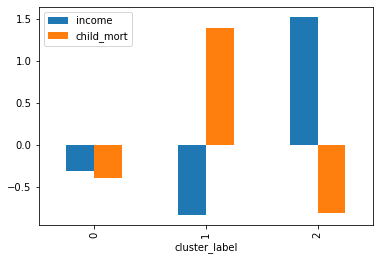

In [694]:
# income and child_mort
data_kmeans_scaled[['income', 'child_mort', 'cluster_label']].groupby('cluster_label').mean().plot(kind='bar')

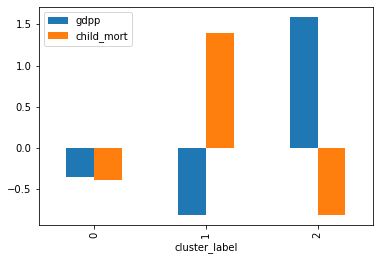

In [695]:
# gdpp and child_mort
data_kmeans_scaled[['gdpp', 'child_mort', 'cluster_label']].groupby('cluster_label').mean().plot(kind='bar')

In [696]:
data_kmeans.cluster_label.value_counts()

0    80
1    46
2    41
Name: cluster_label, dtype: int64

#### It seems like countries in cluster 1 are in dire need of the aid. 

The ciuntries in cluster 1 are in dire need of the aid, as they have low income and low gdpp per capita. The child mortality is also high if the gdpp per capita and income is low.

In [697]:
target_df = data_kmeans[data_kmeans['cluster_label'] == 1]
target_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label
0,Afghanistan,90.2,10.00,7.58,44.9,1610.0,9.440,56.2,5.82,553.0,1
3,Angola,119.0,62.30,2.85,42.9,5900.0,22.400,60.1,6.16,3530.0,1
17,Benin,111.0,23.80,4.10,37.2,1820.0,0.885,61.8,5.36,758.0,1
25,Burkina Faso,116.0,19.20,6.74,29.6,1430.0,6.810,57.9,5.87,575.0,1
26,Burundi,93.6,8.92,11.60,39.2,764.0,12.300,57.7,6.26,231.0,1


#### 3.3.3 Finding the countries in dire need of Aid

We can sort the dataframe on the basis of low gdpp, low income and high child mortality and then get the countries that are in dire need to the aid.

Below are the top five countries that needs aid.

1. Burundi
2. Liberia
3. Congo Dem. Rep
4. Niger
5. Sierra Leone

In [730]:
target_df = target_df.sort_values(by=['gdpp', 'income', 'child_mort'], ascending=[True, True, False])
target_df.head(5).country.values

array(['Burundi', 'Liberia', 'Congo, Dem. Rep.', 'Niger', 'Sierra Leone'],
      dtype=object)

In [731]:
scaled_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.410000,0.301239,-0.035794,-0.958349,0.157336,-1.619092,1.926396,-0.947620
1,-0.538949,-0.545995,-0.088966,0.152911,-0.394006,-0.312347,0.647866,-0.865054,-0.540733
2,-0.272833,-0.046793,-0.990604,-0.724314,-0.192552,0.789274,0.670423,-0.034983,-0.498169
3,2.007808,1.100413,-1.490672,-0.137797,-0.667360,1.387054,-1.179234,2.153997,-0.605154
4,-0.695634,0.294009,-0.285963,0.678226,0.227992,-0.601749,0.704258,-0.543736,0.392219


### 3.4 Hierarchical Clustering

Building the Hierarchical model with 3 clusters

#### 3.4.1 Single Linkage

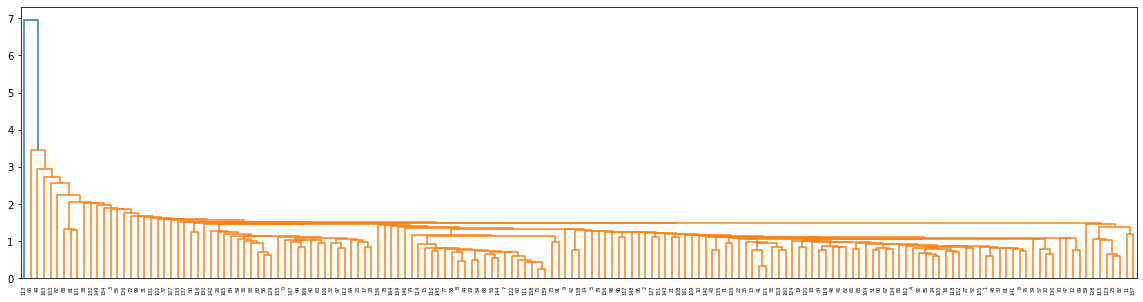

In [806]:
plt.figure(figsize=(20, 5))
single_mergings = linkage(scaled_data, method='single', metric='euclidean')
dendrogram(single_mergings)
plt.show()

In [785]:
single_cluster_labels = cut_tree(single_mergings, n_clusters=3).reshape(-1)
single_cluster_labels = pd.DataFrame(cluster_labels, columns=['cluster_label'])
single_cluster_labels.head()

,cluster_label
0,0
1,0
2,0
3,0
4,0


In [786]:
single_linkage_df = data.copy()
single_linkage_df = pd.concat([single_linkage_df, single_cluster_labels], axis=1)
single_linkage_df.head()

data_single_linkage_scaled = scaled_data.copy()
data_single_linkage_scaled = pd.concat([data_single_linkage_scaled, cluster_labels], axis=1)
data_single_linkage_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label
0,1.291532,-1.410000,0.301239,-0.035794,-0.958349,0.157336,-1.619092,1.926396,-0.947620,0
1,-0.538949,-0.545995,-0.088966,0.152911,-0.394006,-0.312347,0.647866,-0.865054,-0.540733,0
2,-0.272833,-0.046793,-0.990604,-0.724314,-0.192552,0.789274,0.670423,-0.034983,-0.498169,0
3,2.007808,1.100413,-1.490672,-0.137797,-0.667360,1.387054,-1.179234,2.153997,-0.605154,0
4,-0.695634,0.294009,-0.285963,0.678226,0.227992,-0.601749,0.704258,-0.543736,0.392219,0


In [804]:
single_linkage_df.cluster_label.value_counts()

0    165
2      1
1      1
Name: cluster_label, dtype: int64

#### 3.4.2 Single Linkage Profiling

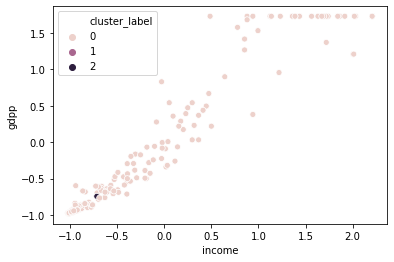

In [787]:
sns.scatterplot(x='income', y='gdpp', hue='cluster_label', data=data_single_linkage_scaled)
plt.show()

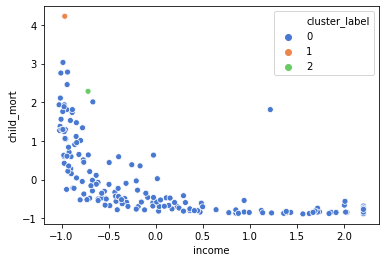

In [788]:
sns.scatterplot(x='income', y='child_mort', hue='cluster_label', data=data_single_linkage_scaled, palette='muted')
plt.show()

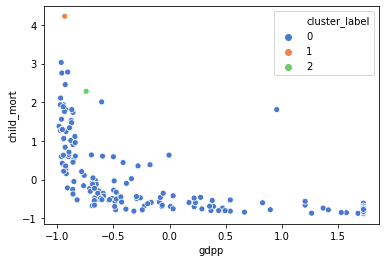

In [789]:
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_label', data=data_single_linkage_scaled, palette='muted')
plt.show()

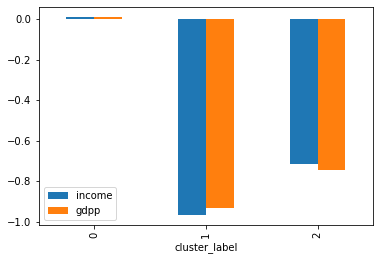

In [790]:
# income and gdpp
data_single_linkage_scaled[['income', 'gdpp', 'cluster_label']].groupby('cluster_label').mean().plot(kind='bar')

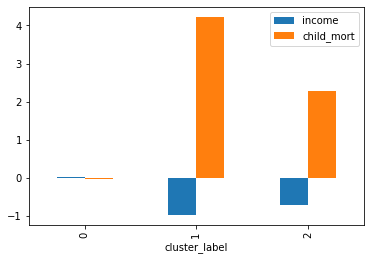

In [791]:
# income and child_mort
data_single_linkage_scaled[['income', 'child_mort', 'cluster_label']].groupby('cluster_label').mean().plot(kind='bar')

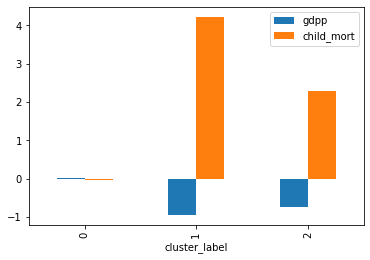

In [792]:
# gdpp and child_mort
data_single_linkage_scaled[['gdpp', 'child_mort', 'cluster_label']].groupby('cluster_label').mean().plot(kind='bar')

In [793]:
single_linkage_target_df = single_linkage_df[single_linkage_df['cluster_label'] == 1]
single_linkage_target_df.head()

single_linkage_target_df = single_linkage_target_df.sort_values(by=['gdpp', 'income', 'child_mort'], ascending=[True, True, False])
single_linkage_target_df.head(5).country.values

array(['Haiti'], dtype=object)

#### 3.4.3 Complete Linkage Profiling

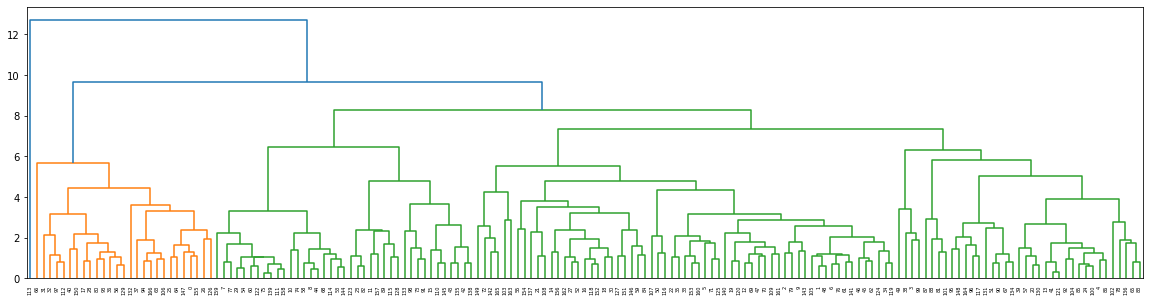

In [794]:
plt.figure(figsize=(20, 5))
complete_mergings = linkage(scaled_data, method='complete', metric='euclidean')
dendrogram(complete_mergings)
plt.show()

In [795]:
complete_cluster_labels = cut_tree(complete_mergings, n_clusters=3).reshape(-1)
complete_cluster_labels = pd.DataFrame(cluster_labels, columns=['cluster_label'])
complete_cluster_labels.head()

,cluster_label
0,0
1,0
2,0
3,0
4,0


In [796]:
complete_linkage_df = data.copy()
complete_linkage_df = pd.concat([complete_linkage_df, complete_cluster_labels], axis=1)
complete_linkage_df.head()

data_complete_linkage_scaled = scaled_data.copy()
data_complete_linkage_scaled = pd.concat([data_complete_linkage_scaled, complete_cluster_labels], axis=1)
data_complete_linkage_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label
0,1.291532,-1.410000,0.301239,-0.035794,-0.958349,0.157336,-1.619092,1.926396,-0.947620,0
1,-0.538949,-0.545995,-0.088966,0.152911,-0.394006,-0.312347,0.647866,-0.865054,-0.540733,0
2,-0.272833,-0.046793,-0.990604,-0.724314,-0.192552,0.789274,0.670423,-0.034983,-0.498169,0
3,2.007808,1.100413,-1.490672,-0.137797,-0.667360,1.387054,-1.179234,2.153997,-0.605154,0
4,-0.695634,0.294009,-0.285963,0.678226,0.227992,-0.601749,0.704258,-0.543736,0.392219,0


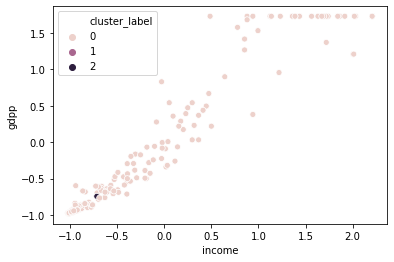

In [797]:
sns.scatterplot(x='income', y='gdpp', hue='cluster_label', data=data_complete_linkage_scaled)
plt.show()

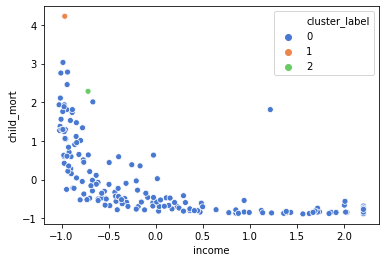

In [798]:
sns.scatterplot(x='income', y='child_mort', hue='cluster_label', data=data_complete_linkage_scaled, palette='muted')
plt.show()

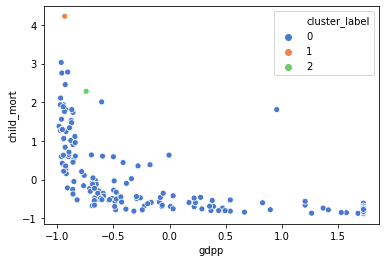

In [799]:
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_label', data=data_complete_linkage_scaled, palette='muted')
plt.show()

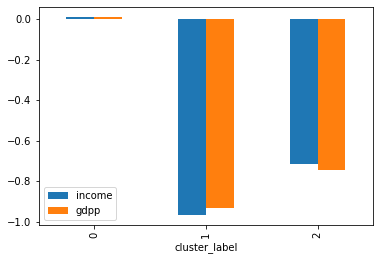

In [800]:
# income and gdpp
data_complete_linkage_scaled[['income', 'gdpp', 'cluster_label']].groupby('cluster_label').mean().plot(kind='bar')

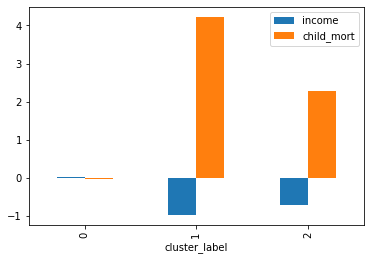

In [801]:
# income and child_mort
data_complete_linkage_scaled[['income', 'child_mort', 'cluster_label']].groupby('cluster_label').mean().plot(kind='bar')

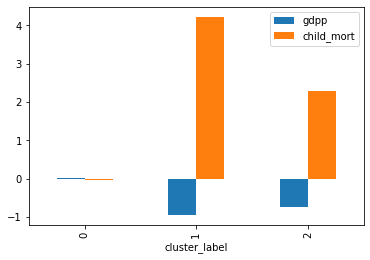

In [802]:
# gdpp and child_mort
data_complete_linkage_scaled[['gdpp', 'child_mort', 'cluster_label']].groupby('cluster_label').mean().plot(kind='bar')

In [803]:
complete_linkage_target_df = complete_linkage_df[complete_linkage_df['cluster_label'] == 1]
complete_linkage_target_df.head()

complete_linkage_target_df = complete_linkage_target_df.sort_values(by=['gdpp', 'income', 'child_mort'], ascending=[True, True, False])
complete_linkage_target_df.head(5).country.values

array(['Haiti'], dtype=object)